In [1]:
import pandas as pd

df = pd.read_csv(r'C:\Users\User\AppData\Local\Temp\4f0709bf-73b6-42e2-8233-79ba5de5e393_estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition.zip.393\ObesityDataSet_raw_and_data_sinthetic.csv')

In [2]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
df.rename(columns={'FAVC': 'HIGH_KCAL_FOOD_INTAKE', 'FCVC': 'vegetables_per_meal', 'NCP': 'meals_daily', 'CAEC': 'snacks', 'SCC': 'calorie_counting', 'FAF': 'phyisical_activity', 'TUE': 'tech_use', 'CALC':'alcohol_use', 'MTRANS': 'transport_form', 'NObeyesdad': 'obesity_lvl' }, inplace=True)
print(df.columns)

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'HIGH_KCAL_FOOD_INTAKE', 'vegetables_per_meal', 'meals_daily', 'snacks',
       'SMOKE', 'CH2O', 'calorie_counting', 'phyisical_activity', 'tech_use',
       'alcohol_use', 'transport_form', 'obesity_lvl'],
      dtype='object')


In [7]:
df.columns = df.columns.str.lower()
print(df.columns)

Index(['gender', 'age', 'height', 'weight', 'family_history_with_overweight',
       'high_kcal_food_intake', 'vegetables_per_meal', 'meals_daily', 'snacks',
       'smoke', 'ch2o', 'calorie_counting', 'phyisical_activity', 'tech_use',
       'alcohol_use', 'transport_form', 'obesity_lvl'],
      dtype='object')


In [10]:
df.null_values = df.isnull().sum()
print(df.null_values)

gender                            0
age                               0
height                            0
weight                            0
family_history_with_overweight    0
high_kcal_food_intake             0
vegetables_per_meal               0
meals_daily                       0
snacks                            0
smoke                             0
ch2o                              0
calorie_counting                  0
phyisical_activity                0
tech_use                          0
alcohol_use                       0
transport_form                    0
obesity_lvl                       0
dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_23672\413608792.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.null_values = df.isnull().sum()


In [11]:
df.duplicated_rows = df.duplicated().sum()
print(df.duplicated_rows)

24


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          2111 non-null   object 
 1   age                             2111 non-null   float64
 2   height                          2111 non-null   float64
 3   weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   high_kcal_food_intake           2111 non-null   object 
 6   vegetables_per_meal             2111 non-null   float64
 7   meals_daily                     2111 non-null   float64
 8   snacks                          2111 non-null   object 
 9   smoke                           2111 non-null   object 
 10  ch2o                            2111 non-null   float64
 11  calorie_counting                2111 non-null   object 
 12  phyisical_activity              21

In [14]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          2087 non-null   object 
 1   age                             2087 non-null   float64
 2   height                          2087 non-null   float64
 3   weight                          2087 non-null   float64
 4   family_history_with_overweight  2087 non-null   object 
 5   high_kcal_food_intake           2087 non-null   object 
 6   vegetables_per_meal             2087 non-null   float64
 7   meals_daily                     2087 non-null   float64
 8   snacks                          2087 non-null   object 
 9   smoke                           2087 non-null   object 
 10  ch2o                            2087 non-null   float64
 11  calorie_counting                2087 non-null   object 
 12  phyisical_activity              2087 no

In [15]:
df.describe()

,age,height,weight,vegetables_per_meal,meals_daily,ch2o,phyisical_activity,tech_use
count,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000
mean,24.353090,1.702674,86.858730,2.421466,2.701179,2.004749,1.012812,0.663035
std,6.368801,0.093186,26.190847,0.534737,0.764614,0.608284,0.853475,0.608153
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.915937,1.630178,66.000000,2.000000,2.697467,1.590922,0.124505,0.000000
50%,22.847618,1.701584,83.101100,2.396265,3.000000,2.000000,1.000000,0.630866
75%,26.000000,1.769491,108.015907,3.000000,3.000000,2.466193,1.678102,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [17]:

numerical_cols = df.select_dtypes(include='number').columns

# Exclude the 'height' column from rounding
cols_to_round = [col for col in numerical_cols if col != 'height']

# Round the values in the selected columns to whole numbers
df[cols_to_round] = df[cols_to_round].apply(lambda x: x.round(0).astype(int))


print(df.head())

   gender  age  height  weight family_history_with_overweight  \
0  Female   21    1.62      64                            yes   
1  Female   21    1.52      56                            yes   
2    Male   23    1.80      77                            yes   
3    Male   27    1.80      87                             no   
4    Male   22    1.78      90                             no   

  high_kcal_food_intake  vegetables_per_meal  meals_daily     snacks smoke  \
0                    no                    2            3  Sometimes    no   
1                    no                    3            3  Sometimes   yes   
2                    no                    2            3  Sometimes    no   
3                    no                    3            3  Sometimes    no   
4                    no                    2            1  Sometimes    no   

   ch2o calorie_counting  phyisical_activity  tech_use alcohol_use  \
0     2               no                   0         1          no   


Exploring Categorical Data

In [25]:
from IPython.display import display

for column in df.select_dtypes(include='object').columns:
    display(df[column].value_counts())
    print("\n")

gender
Male      1052
Female    1035
Name: count, dtype: int64

family_history_with_overweight
yes    1722
no      365
Name: count, dtype: int64

high_kcal_food_intake
yes    1844
no      243
Name: count, dtype: int64

snacks
Sometimes     1761
Frequently     236
Always          53
no              37
Name: count, dtype: int64

smoke
no     2043
yes      44
Name: count, dtype: int64

calorie_counting
no     1991
yes      96
Name: count, dtype: int64

alcohol_use
Sometimes     1380
no             636
Frequently      70
Always           1
Name: count, dtype: int64

transport_form
Public_Transportation    1558
Automobile                456
Walking                    55
Motorbike                  11
Bike                        7
Name: count, dtype: int64

obesity_lvl
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_II    290
Normal_Weight          282
Overweight_Level_I     276
Insufficient_Weight    267
Name: count, dtype: int64

In [27]:
# Convert all string values in object columns to lowercase
for column in df.select_dtypes(include='object').columns:
    df[column] = df[column].apply(lambda x: x.lower() if isinstance(x, str) else x)
    print(df[column].value_counts())

gender
male      1052
female    1035
Name: count, dtype: int64
family_history_with_overweight
yes    1722
no      365
Name: count, dtype: int64
high_kcal_food_intake
yes    1844
no      243
Name: count, dtype: int64
snacks
sometimes     1761
frequently     236
always          53
no              37
Name: count, dtype: int64
smoke
no     2043
yes      44
Name: count, dtype: int64
calorie_counting
no     1991
yes      96
Name: count, dtype: int64
alcohol_use
sometimes     1380
no             636
frequently      70
always           1
Name: count, dtype: int64
transport_form
public_transportation    1558
automobile                456
walking                    55
motorbike                  11
bike                        7
Name: count, dtype: int64
obesity_lvl
obesity_type_i         351
obesity_type_iii       324
obesity_type_ii        297
overweight_level_ii    290
normal_weight          282
overweight_level_i     276
insufficient_weight    267
Name: count, dtype: int64


~~ Univariate Analysis ~~

Bar Plots for Categorical Data:

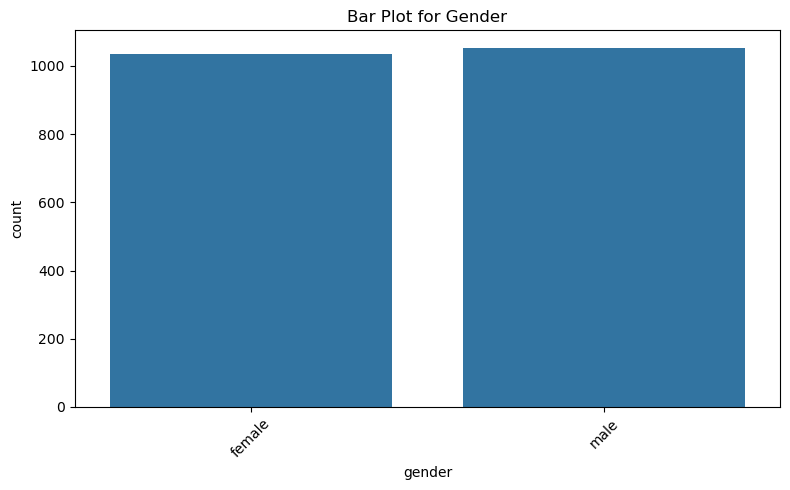

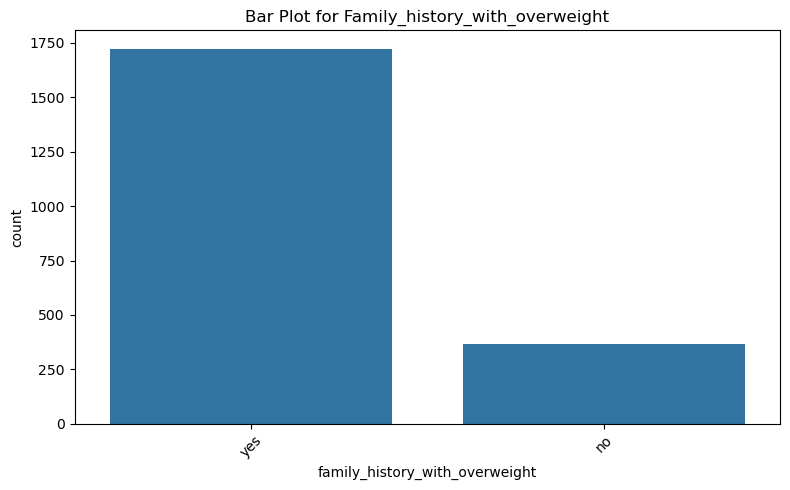

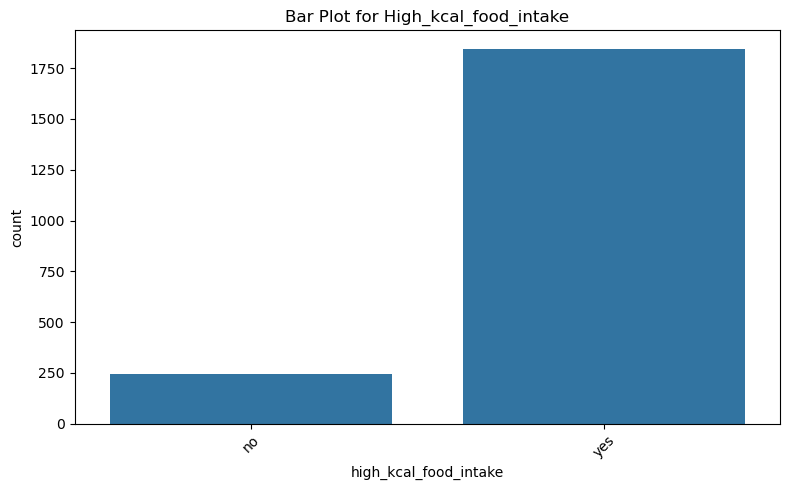

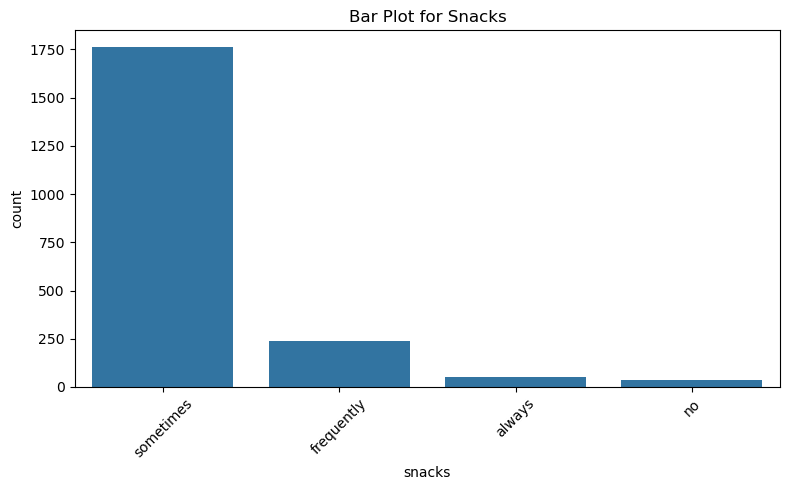

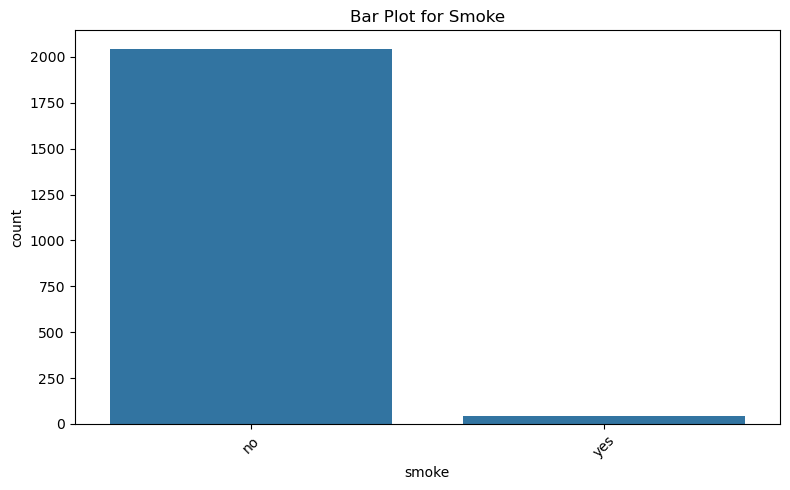

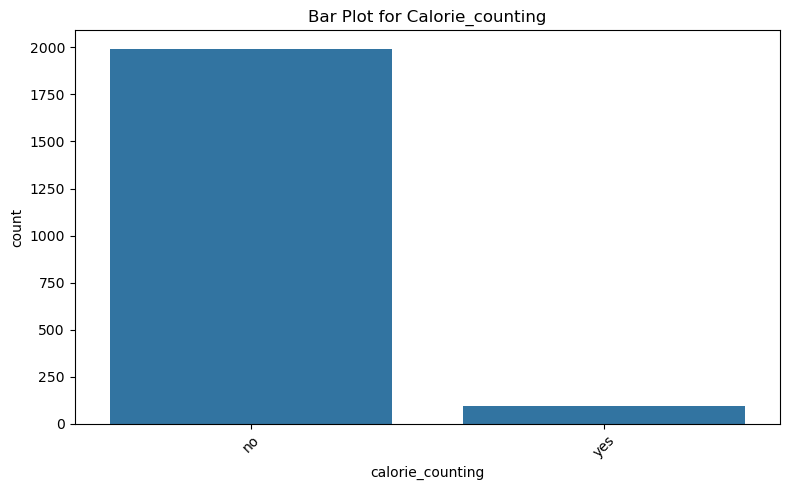

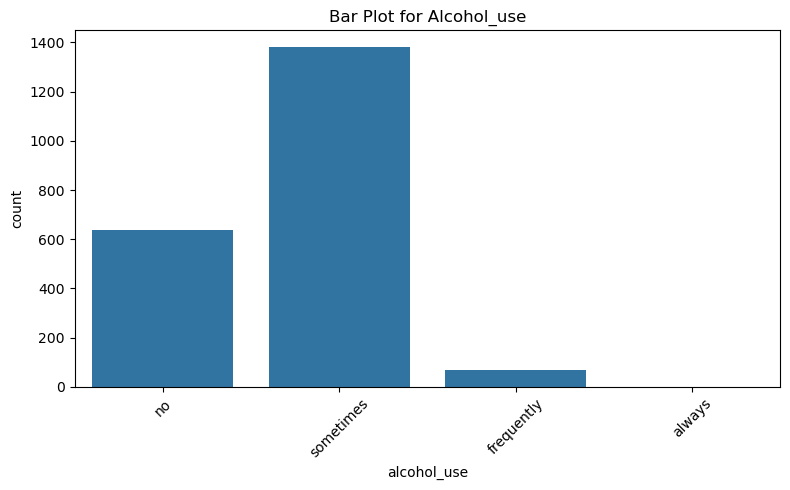

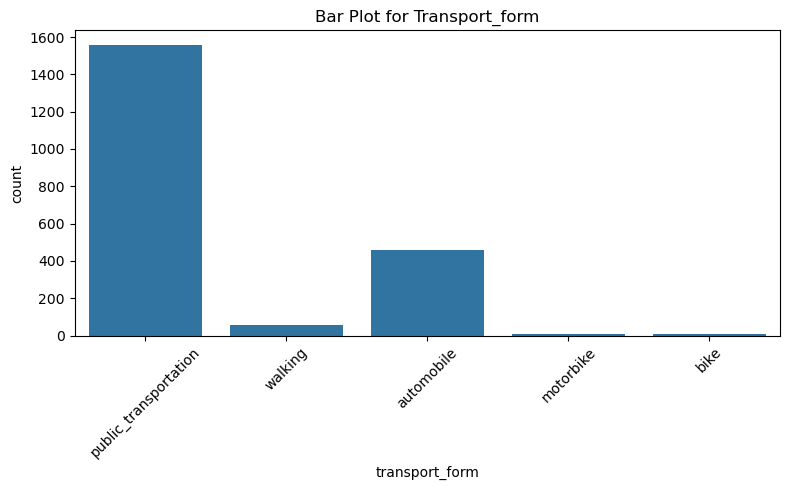

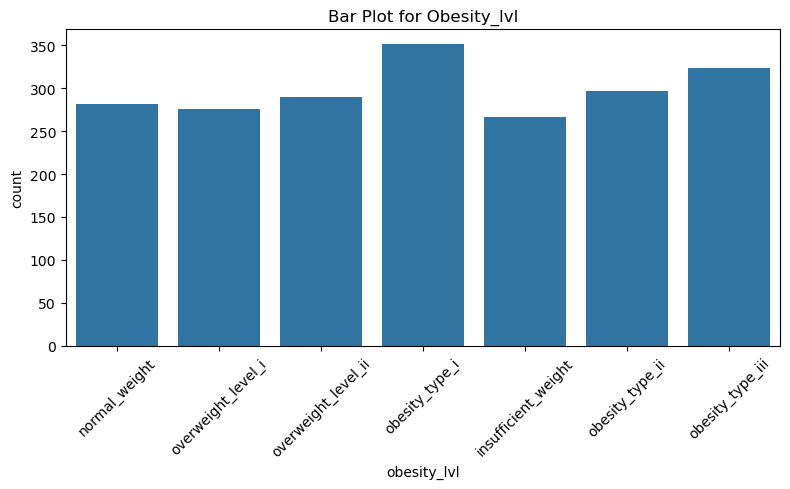

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Loop through each categorical column and create a bar plot
for column in df.select_dtypes(include='object').columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=column)
    plt.title(f'Bar Plot for {column.capitalize()}')
    plt.xticks(rotation=45)  # Rotate x labels for better readability, if needed
    plt.tight_layout()
    plt.show()

Numerical Variables:

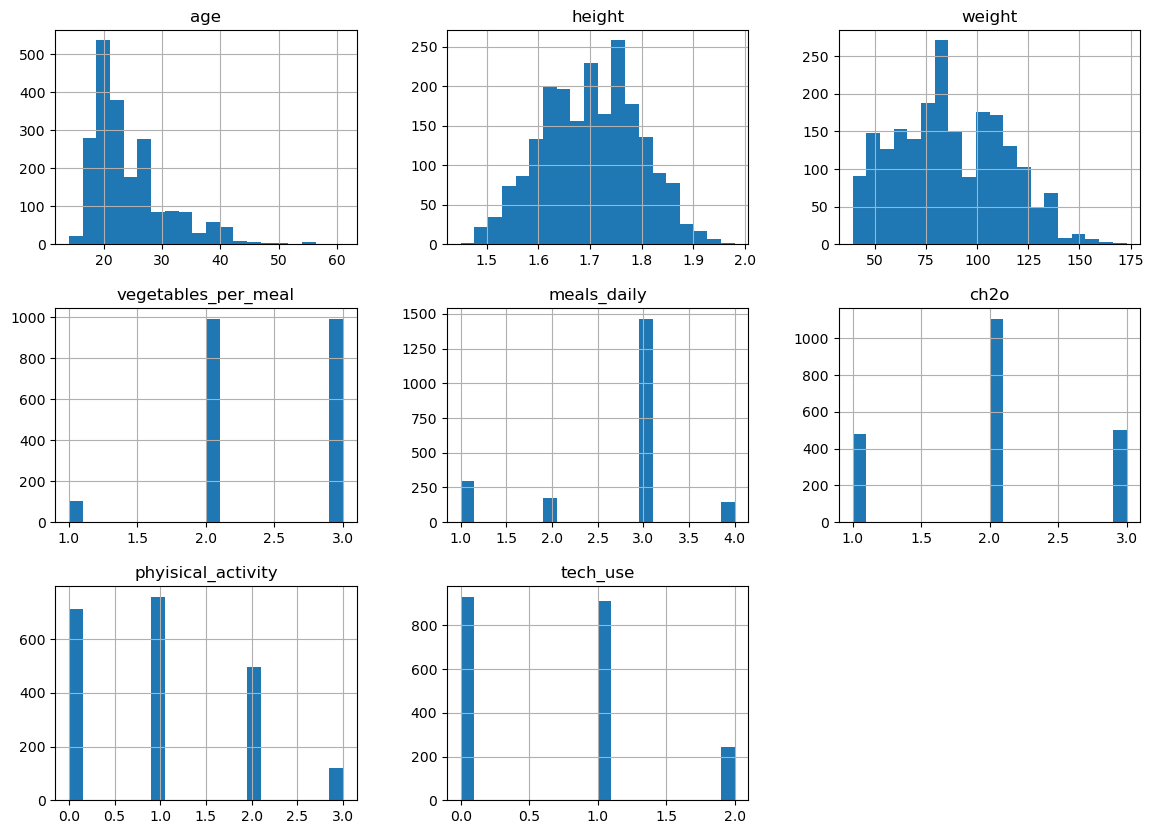

In [34]:
df.hist(bins=20, figsize=(14, 10))
plt.show()

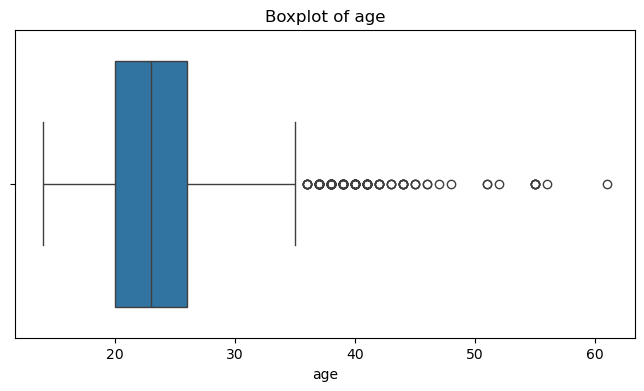

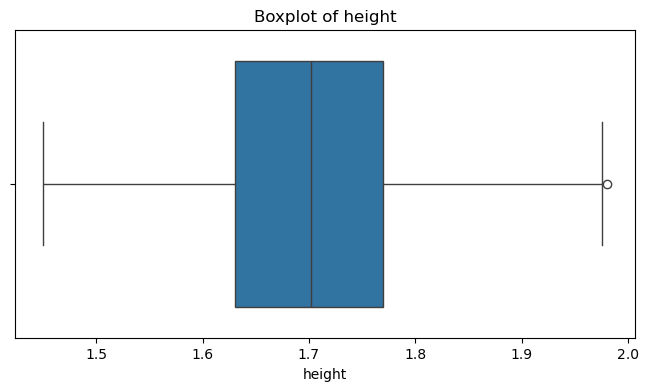

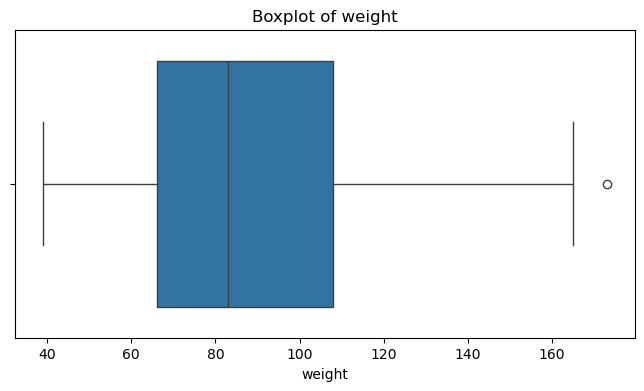

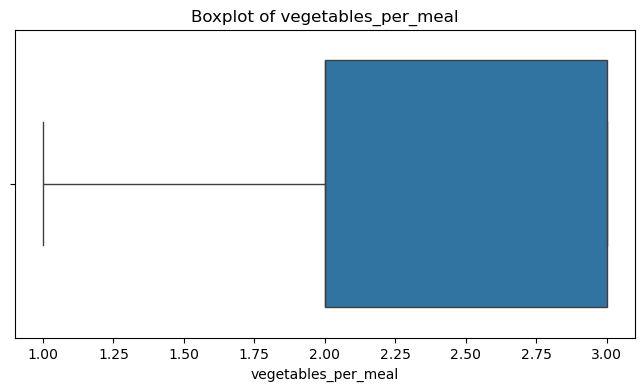

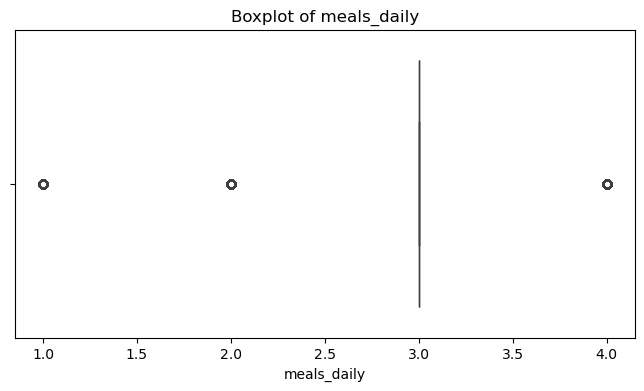

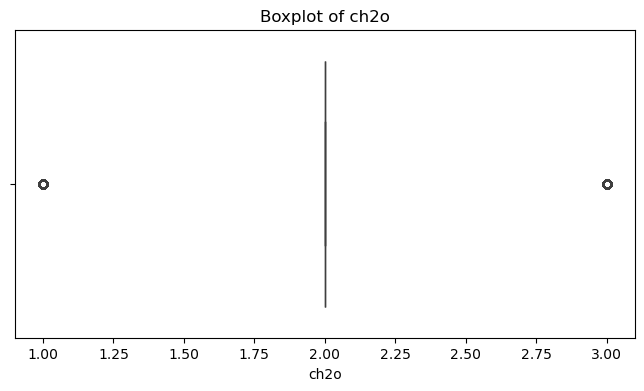

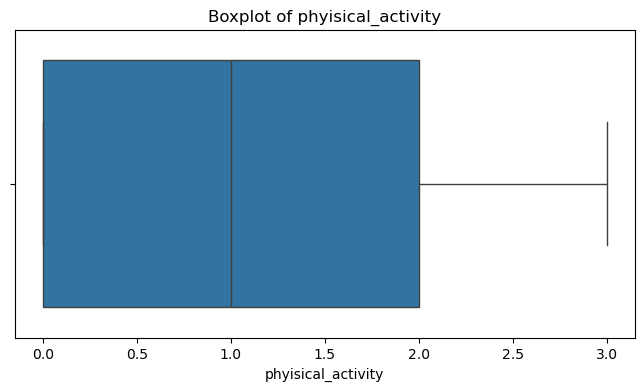

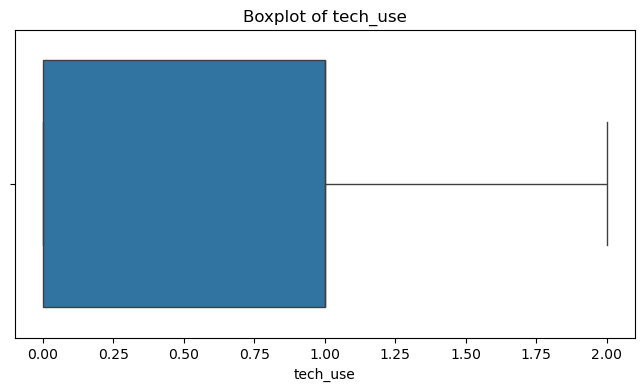

In [35]:
for column in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

~~ Bivariate Analysis ~~

Correlation Matrix (Numerical Variables):

In [48]:
# Check for NaN values in 'obesity_lvl' column
nan_count = df['obesity_lvl'].isnull().sum()
print(f"Number of NaN values in 'obesity_lvl': {nan_count}")

Number of NaN values in 'obesity_lvl': 0


In [52]:
# Check for unique values in the column
print(df['obesity_lvl'].unique())

['Normal_weight' 'Overweight_level_i' 'Overweight_level_ii'
 'Obesity_type_i' 'Insufficient_weight' 'Obesity_type_ii'
 'Obesity_type_iii']


In [53]:
# Define the correct mapping
obesity_mapping = {
    'Insufficient_weight': 0,
    'Normal_weight': 1,
    'Overweight_level_i': 2,
    'Overweight_level_ii': 3,
    'Obesity_type_i': 4,
    'Obesity_type_ii': 5,
    'Obesity_type_iii': 6
}

# Apply the mapping to the 'obesity_lvl' column
df['obesity_lvl_numeric'] = df['obesity_lvl'].map(obesity_mapping)

# Verify the mapping
print(df[['obesity_lvl', 'obesity_lvl_numeric']].head())

           obesity_lvl  obesity_lvl_numeric
0        Normal_weight                    1
1        Normal_weight                    1
2        Normal_weight                    1
3   Overweight_level_i                    2
4  Overweight_level_ii                    3


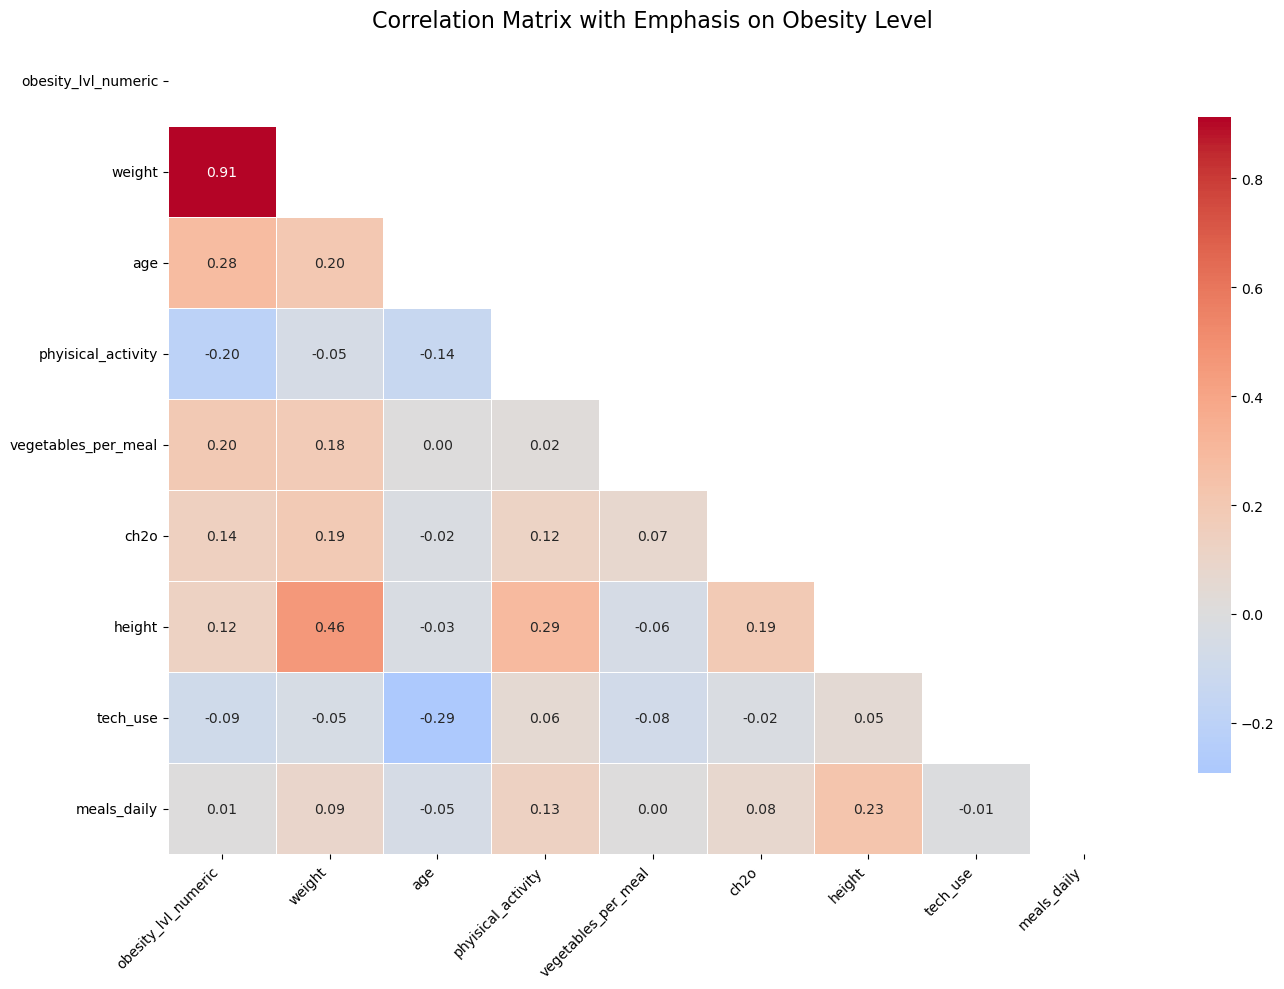

In [60]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix using only numeric columns
correlation_matrix = df.select_dtypes(include='number').corr()

# Sort columns by the correlation with 'obesity_lvl_numeric'
sorted_columns = correlation_matrix['obesity_lvl_numeric'].abs().sort_values(ascending=False).index

# Reorder the whole correlation matrix
correlation_matrix = correlation_matrix.loc[sorted_columns, sorted_columns]

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(14, 10))

# Draw the heatmap with sorted columns and enhanced aesthetics
sns.heatmap(
    correlation_matrix, 
    mask=mask, 
    cmap='coolwarm', 
    annot=True, 
    fmt=".2f", 
    linewidths=0.5, 
    cbar_kws={"shrink": .8}, 
    center=0
)

# Set titles and labels
plt.title('Correlation Matrix with Emphasis on Obesity Level', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Show plot
plt.tight_layout()
plt.show()

Crosstabs for Categorical Variables:

obesity_lvl  Insufficient_weight  Normal_weight  Obesity_type_i  \
gender                                                            
female                       169            137             156   
male                          98            145             195   

obesity_lvl  Obesity_type_ii  Obesity_type_iii  Overweight_level_i  \
gender                                                               
female                     2               323                 145   
male                     295                 1                 131   

obesity_lvl  Overweight_level_ii  
gender                            
female                       103  
male                         187  


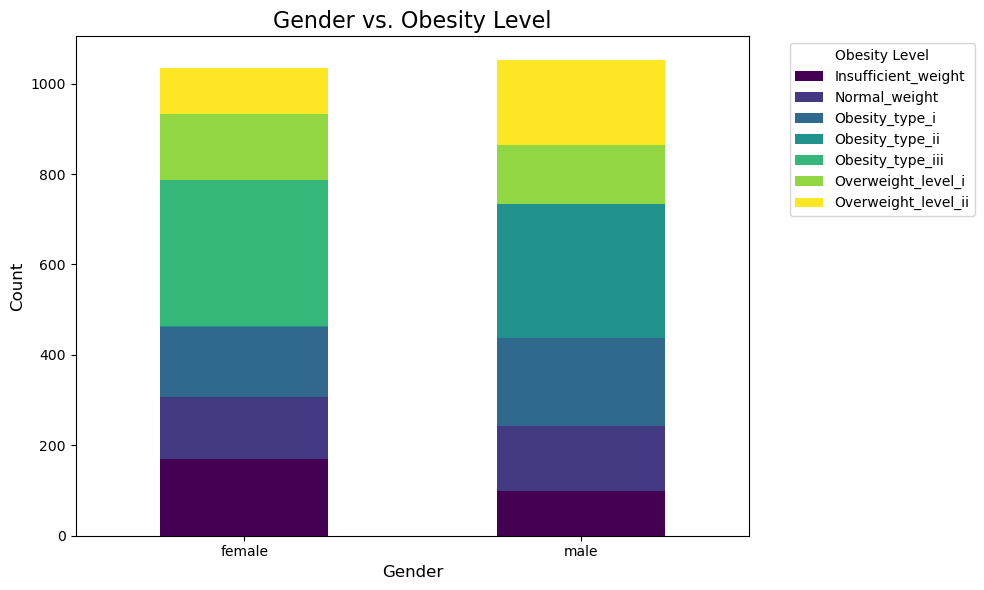

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example crosstab between 'gender' and 'obesity_lvl'
crosstab_result = pd.crosstab(df['gender'], df['obesity_lvl'])

# Print the crosstab for inspection
print(crosstab_result)

# Plotting the crosstab with a bar plot, stacking for clarity
crosstab_result.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# Enhance plot details
plt.title('Gender vs. Obesity Level', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)  # Keep x labels horizontal for readability
plt.legend(title='Obesity Level', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend outside
plt.tight_layout()

# Show the plot
plt.show()

obesity_lvl  Insufficient_weight  Normal_weight  Obesity_type_i  \
snacks                                                            
always                         2             35               6   
frequently                   117             81               6   
no                             3             10               1   
sometimes                    145            156             338   

obesity_lvl  Obesity_type_ii  Obesity_type_iii  Overweight_level_i  \
snacks                                                               
always                     2                 0                   5   
frequently                 1                 1                  14   
no                         1                 0                  21   
sometimes                293               323                 236   

obesity_lvl  Overweight_level_ii  
snacks                            
always                         3  
frequently                    16  
no                             1  
s

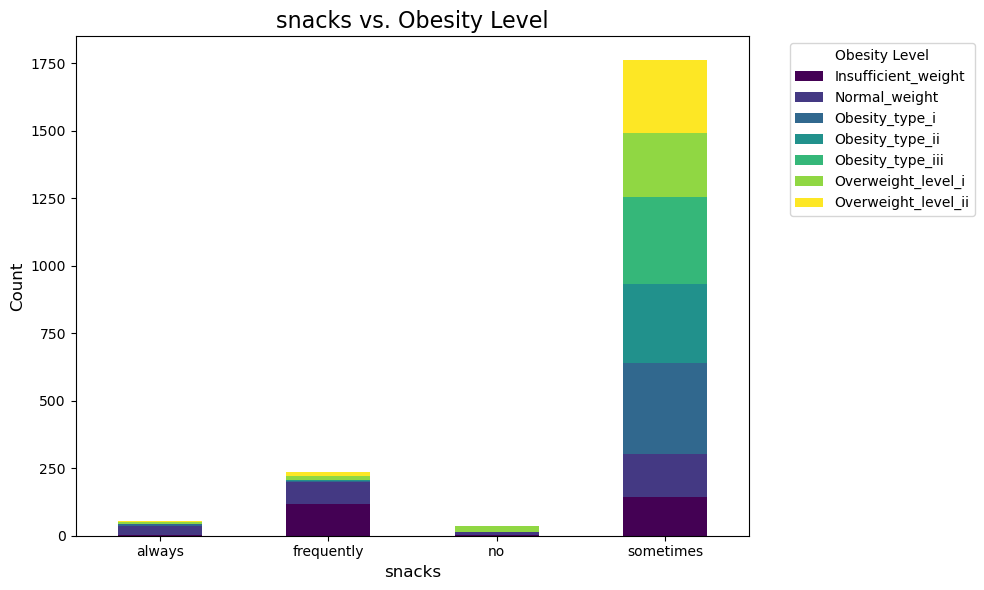

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example crosstab between 'gender' and 'obesity_lvl'
crosstab_result = pd.crosstab(df['snacks'], df['obesity_lvl'])

# Print the crosstab for inspection
print(crosstab_result)

# Plotting the crosstab with a bar plot, stacking for clarity
crosstab_result.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# Enhance plot details
plt.title('snacks vs. Obesity Level', fontsize=16)
plt.xlabel('snacks', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)  # Keep x labels horizontal for readability
plt.legend(title='Obesity Level', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend outside
plt.tight_layout()

# Show the plot
plt.show()

obesity_lvl                     Insufficient_weight  Normal_weight  \
family_history_with_overweight                                       
no                                              142            130   
yes                                             125            152   

obesity_lvl                     Obesity_type_i  Obesity_type_ii  \
family_history_with_overweight                                    
no                                           7                1   
yes                                        344              296   

obesity_lvl                     Obesity_type_iii  Overweight_level_i  \
family_history_with_overweight                                         
no                                             0                  67   
yes                                          324                 209   

obesity_lvl                     Overweight_level_ii  
family_history_with_overweight                       
no                                               18  

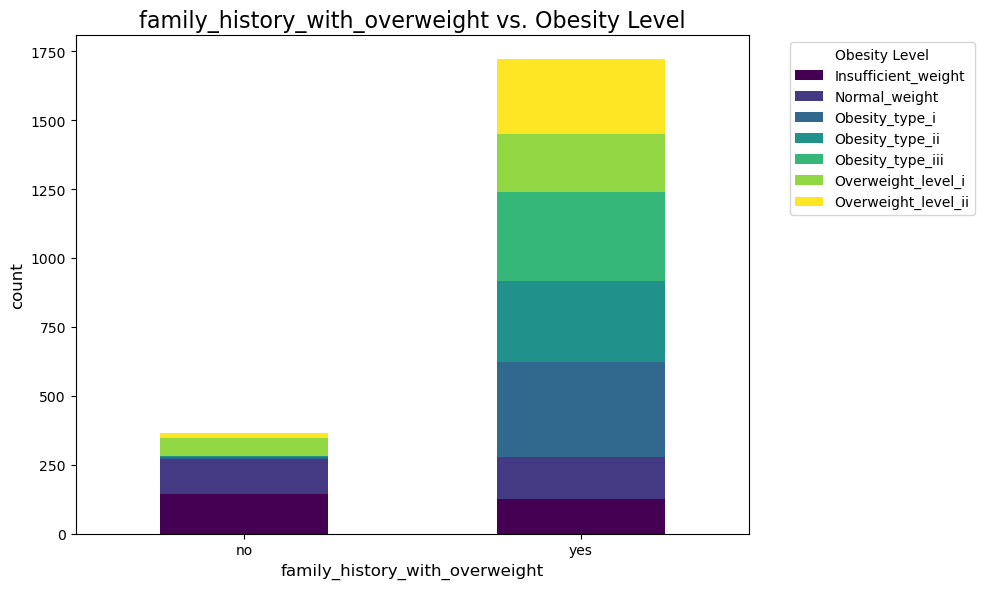

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example crosstab between 'family_history_with_overweight' and 'obesity_lvl'
crosstab_result = pd.crosstab(df['family_history_with_overweight'], df['obesity_lvl'])

# Print the crosstab for inspection
print(crosstab_result)

# Plotting the crosstab with a bar plot, stacking for clarity
crosstab_result.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# Enhance plot details
plt.title('family_history_with_overweight vs. Obesity Level', fontsize=16)
plt.xlabel('family_history_with_overweight', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.xticks(rotation=0)  # Keep x labels horizontal for readability
plt.legend(title='Obesity Level', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend outside
plt.tight_layout()

# Show the plot
plt.show()